## **Step 1: Import the necessary libraries**

In [ ]:
!pip install svgling

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.1/67.1 kB 2.8 MB/s eta 0:00:00


In [ ]:
import nltk
import spacy
import pandas as pd
from scipy.stats import pearsonr
from nltk.metrics import jaccard_distance
from nltk.stem import WordNetLemmatizer
import svgling
from nltk.corpus import conll2000
from nltk import tree2conlltags
import nltk

nltk.download('maxent_ne_chunker')
nltk.download('punkt_tab')
nltk.download('conll2000')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger_eng')
nltk.download('words')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('stopwords')
nlp = spacy.load("en_core_web_sm")

[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping chunkers/maxent_ne_chunker.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package conll2000 to /root/nltk_data...
[nltk_data]   Unzipping corpora/conll2000.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger_eng.zip.
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


## **Step 2: Read the data**

In [ ]:
dt = pd.read_csv('STS.input.SMTeuroparl.txt',sep='\t',header=None)
dt['gs'] = pd.read_csv('STS.gs.SMTeuroparl.txt',sep='\t',header=None)
dt['gs_normalized'] = dt['gs'] / 5
dt.head()

,0,1,gs,gs_normalized
0,The leaders have now been given a new chance a...,The leaders benefit aujourd' hui of a new luck...,4.50,0.90
1,Amendment No 7 proposes certain changes in the...,Amendment No 7 is proposing certain changes in...,5.00,1.00
2,Let me remind you that our allies include ferv...,I would like to remind you that among our alli...,4.25,0.85
3,The vote will take place today at 5.30 p.m.,The vote will take place at 5.30pm,4.50,0.90
4,"The fishermen are inactive, tired and disappoi...","The fishermen are inactive, tired and disappoi...",5.00,1.00


## **Step 3: Compare the NLTK lemmatizer with spaCY lemmatizer**

### **NLTK Lemmatizer**

In [ ]:
# Import the set of English stop words from the nltk corpus
stop_words = set(nltk.corpus.stopwords.words('english'))

# Function to filter and tokenize a sentence
def tokenize_sentence(sentence):
  return [(word,tag) for word,tag in sentence if (word.lower() not in stop_words) and (word.isalnum())]

# Function to perform lemmatization
def lemmatize(p):
    wnl = WordNetLemmatizer()
    d = {
        'NN': 'n', 'NNS': 'n',
        'JJ': 'a', 'JJR': 'a', 'JJS': 'a',
        'VB': 'v', 'VBD': 'v', 'VBG': 'v',
        'VBN': 'v', 'VBP': 'v', 'VBZ': 'v',
        'RB': 'r', 'RBR': 'r', 'RBS': 'r'
    }
    if p[1] in d:
        return wnl.lemmatize(p[0], pos=d[p[1]])
    return p[0]

# Function to lemmatize a list of words using NLTK
def lemmatizeWordsNLTK(words):
    # Step 1: POS tagging on the list of words
    pos_tags = nltk.pos_tag(words)
    # Step 2: Filter tokens based on stop words and non-alphanumeric check
    filtered_tokens = tokenize_sentence(pos_tags)
    # Step 3: Lemmatize the filtered tokens
    lemmatized_words = {lemmatize(token) for token in filtered_tokens}

    return lemmatized_words

In [ ]:
dtLemmaNLTK = dt.copy()
dtLemmaNLTK['lemmatizeNLTK0'] = dtLemmaNLTK.apply(lambda row: lemmatizeWordsNLTK(nltk.word_tokenize(row[0])),axis=1)
dtLemmaNLTK['lemmatizeNLTK1'] = dtLemmaNLTK.apply(lambda row: lemmatizeWordsNLTK(nltk.word_tokenize(row[1])),axis=1)
dtLemmaNLTK['jaccardLemmatizeNLTK'] = dtLemmaNLTK.apply(lambda row: 1-jaccard_distance(row['lemmatizeNLTK0'],row['lemmatizeNLTK1']),axis=1)
dtLemmaNLTK.head()


,0,1,gs,gs_normalized,lemmatizeNLTK0,lemmatizeNLTK1,jaccardLemmatizeNLTK
0,The leaders have now been given a new chance a...,The leaders benefit aujourd' hui of a new luck...,4.50,0.90,"{hope, new, us, give, leader, chance, seize, let}","{luck, new, hui, aujourd, therefore, benefit, ...",0.307692
1,Amendment No 7 proposes certain changes in the...,Amendment No 7 is proposing certain changes in...,5.00,1.00,"{certain, change, reference, propose, Amendmen...","{certain, change, reference, propose, Amendmen...",1.000000
2,Let me remind you that our allies include ferv...,I would like to remind you that among our alli...,4.25,0.85,"{fervent, Let, remind, tax, supporter, include...","{strong, like, remind, tax, would, among, ally}",0.272727
3,The vote will take place today at 5.30 p.m.,The vote will take place at 5.30pm,4.50,0.90,"{vote, place, today, take}","{vote, place, take}",0.750000
4,"The fishermen are inactive, tired and disappoi...","The fishermen are inactive, tired and disappoi...",5.00,1.00,"{tired, disappointed, inactive, fisherman}","{tired, disappointed, inactive, fisherman}",1.000000


### **spaCY Lemmatizer**

In [ ]:
def lemmatize_spaCy(sentence):
  lemmatizedWordsList = []
  sen = nlp(sentence)
   # Iterate through each token in the processed document
  lemmatizedWordsList = [
        token.lemma_.lower()  # Get the lemmatized form of the token in lowercase
        for token in sen
        if not (token.is_stop or token.pos_ == 'PUNCT')  # Filter out stop words and punctuation
  ]
  return set(lemmatizedWordsList)

In [ ]:
dtLemmaSpaCy = dt.copy()
dtLemmaSpaCy['lemmatizeSpaCy0'] = dtLemmaSpaCy.apply(lambda row: lemmatize_spaCy(row[0]),axis=1)
dtLemmaSpaCy['lemmatizeSpaCy1'] = dtLemmaSpaCy.apply(lambda row: lemmatize_spaCy(row[1]),axis=1)
dtLemmaSpaCy['jaccardLemmatizeSpaCy'] = dtLemmaSpaCy.apply(lambda row: 1-jaccard_distance(row['lemmatizeSpaCy0'],row['lemmatizeSpaCy1']),axis=1)
dtLemmaSpaCy.head()

,0,1,gs,gs_normalized,lemmatizeSpaCy0,lemmatizeSpaCy1,jaccardLemmatizeSpaCy
0,The leaders have now been given a new chance a...,The leaders benefit aujourd' hui of a new luck...,4.50,0.90,"{hope, seize, give, leader, new, let, chance}","{seize, hui, aujourd, benefit, leader, new, le...",0.363636
1,Amendment No 7 proposes certain changes in the...,Amendment No 7 is proposing certain changes in...,5.00,1.00,"{paragraph, certain, propose, 7, amendment, re...","{paragraph, certain, propose, 7, amendment, re...",1.000000
2,Let me remind you that our allies include ferv...,I would like to remind you that among our alli...,4.25,0.85,"{ally, fervent, supporter, include, let, remin...","{ally, like, strong, remind, tax}",0.333333
3,The vote will take place today at 5.30 p.m.,The vote will take place at 5.30pm,4.50,0.90,"{today, p.m., place, 5.30, vote}","{place, 5.30pm, vote}",0.333333
4,"The fishermen are inactive, tired and disappoi...","The fishermen are inactive, tired and disappoi...",5.00,1.00,"{disappointed, inactive, tired, fisherman}","{disappointed, inactive, tired, fisherman}",1.000000


### **Compute Pearson correlation**

In [ ]:
def compute_pearson_correlation(refs, tsts):
    # Check if lengths of the inputs are the same
    if len(refs) != len(tsts):
        raise ValueError("The two input lists must have the same length.")

    # Compute Pearson correlation
    correlation, _ = pearsonr(refs, tsts)
    return correlation

In [ ]:
correlation_NLTK = compute_pearson_correlation(dtLemmaNLTK['gs_normalized'], dtLemmaNLTK['jaccardLemmatizeNLTK'])
print(f'Pearson Correlation NLTK Lemmatizer: {correlation_NLTK:.4f}')

Pearson Correlation NLTK Lemmatizer: 0.4798


In [ ]:
correlation_spaCY = compute_pearson_correlation(dtLemmaSpaCy['gs_normalized'], dtLemmaSpaCy['jaccardLemmatizeSpaCy'])
print(f'Pearson Correlation spaCY Lemmatizer: {correlation_spaCY:.4f}')

Pearson Correlation spaCY Lemmatizer: 0.5205


* As shown by the Pearson Correlation values, the spaCy lemmatizer outperforms the NLTK lemmatizer. This is likely because spaCy's functions are generally more effective at identifying the key words that best capture the sentence's meaning. Therefore, we will therefore use spaCy for the named entities exercise.

## **Step 4: Name entities with SpaCy using the name entity text**

* In this case, we first merge named entities into a single token, as keeping them separate can affect the sentence similarity measurements. For instance, instead of treating "John" and "Smith" as two separate tokens, we combine them into a single token, "John Smith."

 Additionally, we return a list of the original text instead of lemmas. The token.text provides the exact string content of the token as it appears in the text. Therefore, we will compute the Jaccard distance using this text rather than the lemmas.

In [ ]:
# Function to extract named entities and lemmatize text using spaCy
def nameEntities_text_spaCY(sentence):
    # Process the sentence using spaCy's NLP pipeline
    sen = nlp(sentence)

    # Merge named entities to treat them as a single token
    with sen.retokenize() as retokenizer:
        tokens = [token for token in sen]
        for ent in sen.ents:
            # Merge the tokens for the named entity into a single token
            retokenizer.merge(
                sen[ent.start:ent.end],
                attrs={"LEMMA": " ".join([tokens[i].text for i in range(ent.start, ent.end)])}
            )
    # Create a list of tokens in lowercase, excluding stop words and punctuation
    texts = [
        (token.text).lower()
        for token in sen
        if not (token.is_stop or token.pos_ == 'PUNCT')
    ]
    return texts

In [ ]:
dtentities_text_spaCy = dt.copy()
dtentities_text_spaCy['tokens_NE_spaCY0'] = dtentities_text_spaCy.apply(lambda row: set(nameEntities_text_spaCY(row[0])),axis=1)
dtentities_text_spaCy['tokens_NE_spaCY1'] = dtentities_text_spaCy.apply(lambda row: set(nameEntities_text_spaCY(row[1])),axis=1)
dtentities_text_spaCy['jaccard_NE_spaCY'] = dtentities_text_spaCy.apply(lambda row: 1-jaccard_distance(row['tokens_NE_spaCY0'],row['tokens_NE_spaCY1']),axis=1)
dtentities_text_spaCy.head()

,0,1,gs,gs_normalized,tokens_NE_spaCY0,tokens_NE_spaCY1,jaccard_NE_spaCY
0,The leaders have now been given a new chance a...,The leaders benefit aujourd' hui of a new luck...,4.50,0.90,"{hope, seize, given, let, chance, new, leaders}","{seize, hui, aujourd, benefit, let, new, leade...",0.363636
1,Amendment No 7 proposes certain changes in the...,Amendment No 7 is proposing certain changes in...,5.00,1.00,"{references, certain, paragraphs, 7, proposes,...","{references, certain, paragraphs, proposing, 7...",0.750000
2,Let me remind you that our allies include ferv...,I would like to remind you that among our alli...,4.25,0.85,"{allies, fervent, include, let, remind, suppor...","{allies, like, strong, remind, tax}",0.333333
3,The vote will take place today at 5.30 p.m.,The vote will take place at 5.30pm,4.50,0.90,"{place, today, 5.30 p.m., vote}","{place, 5.30pm, vote}",0.400000
4,"The fishermen are inactive, tired and disappoi...","The fishermen are inactive, tired and disappoi...",5.00,1.00,"{inactive, tired, fishermen, disappointed}","{inactive, tired, fishermen, disappointed}",1.000000


* From the first few rows of the DataFrame, it’s evident that most similarity values have either remained the same or even decreased, except for one case. We can see that the issue with "5:30 p.m." has been solved, as it is now treated as a single merged token. This resulted in a higher similarity score compared to using tokenization and lemmatization alone.

## **Step 5: Name entities with SpaCy using the name entity type**

* Here instead of comparing tokens, lemmas or text we are going to compare name entity types. These types provide context about what the entity represents e.g., PERSON, ORG, DATE , TIME etc.

In [ ]:
# Function to extract named entity types using spaCy
def nameEntities_type_spaCY(sentence):
    sen = nlp(sentence)

    # Merge named entities to treat them as a single token
    with sen.retokenize() as retokenizer:
        tokens = [token for token in sen]
        for ent in sen.ents:
            # Merge the tokens for the named entity into a single token
            retokenizer.merge(
                sen[ent.start:ent.end],
                attrs={"LEMMA": " ".join([tokens[i].text for i in range(ent.start, ent.end)])}
            )

    # Extract entity types for each token, excluding stop words and punctuation
    types = [
        token.ent_type_  # Get the entity type (e.g., PERSON, ORG, DATE etc)
        for token in sen
        if not (token.is_stop or token.pos_ == 'PUNCT')
    ]
    return types

In [ ]:
dtentities_type_spaCy = dt.copy()
dtentities_type_spaCy['tokens_NE_spaCY0'] = dtentities_type_spaCy.apply(lambda row: set(nameEntities_type_spaCY(row[0])),axis=1)
dtentities_type_spaCy['tokens_NE_spaCY1'] = dtentities_type_spaCy.apply(lambda row: set(nameEntities_type_spaCY(row[1])),axis=1)
dtentities_type_spaCy['jaccard_NE_spaCY'] = dtentities_type_spaCy.apply(lambda row: 1-jaccard_distance(row['tokens_NE_spaCY0'],row['tokens_NE_spaCY1']),axis=1)
dtentities_type_spaCy.head()

,0,1,gs,gs_normalized,tokens_NE_spaCY0,tokens_NE_spaCY1,jaccard_NE_spaCY
0,The leaders have now been given a new chance a...,The leaders benefit aujourd' hui of a new luck...,4.50,0.90,{},{},1.000000
1,Amendment No 7 proposes certain changes in the...,Amendment No 7 is proposing certain changes in...,5.00,1.00,{},{},1.000000
2,Let me remind you that our allies include ferv...,I would like to remind you that among our alli...,4.25,0.85,{},{},1.000000
3,The vote will take place today at 5.30 p.m.,The vote will take place at 5.30pm,4.50,0.90,"{, TIME, DATE}",{},0.333333
4,"The fishermen are inactive, tired and disappoi...","The fishermen are inactive, tired and disappoi...",5.00,1.00,{},{},1.000000


* Given the limited number of named entities, we think that comparing the sentences based on them is not meaningful. In the first rows of the dataframe we can see that the only recognized name entities type are {DATE, TIME}.

## **Compute Pearson correlation**

In [ ]:
correlation_NE_text = compute_pearson_correlation(dtentities_text_spaCy['gs_normalized'], dtentities_text_spaCy['jaccard_NE_spaCY'])
print(f'Pearson Correlation Name Entity Text: {correlation_NE_text:.4f}')

Pearson Correlation Name Entity Text: 0.4521


In [ ]:
correlation_NE_type = compute_pearson_correlation(dtentities_type_spaCy['gs_normalized'], dtentities_type_spaCy['jaccard_NE_spaCY'])
print(f'Pearson Correlation Name Entity Type: {correlation_NE_type:.4f}')

Pearson Correlation Name Entity Type: 0.0920


* The Pearson Correlation coefficient also shows that the score for named entity types is much lower compared to named entity text. This indicates that using named entity types is not an effective method for comparing sentences.

## **Conclusions**

Fistly we have compared which lemmatizer was better. As the results show, spaCY worked better in our case. So we continued working with spaCY for the name entities. We computed the Jacard similarity for name entities using text, and still the results were not better comparing with just tokenizing and just lemmatizing (from previous labs), this may happen because of singular and plural nouns etc. We also compared the name entities using type, which results in a very low score (the lowest so far), as these sentences do not include numerous name entities and the functions were not able to recognize all of the existing name entity types.



## **Optional Exercise**

Given the word with their POS Tags we define our chunk grammer.

* For Noun Phrase we define optionaly a determiner, following by zero or more adjectives and one or more nouns or proper nouns.
* For Propositional Phrase we define a proposition and a noun phrase.

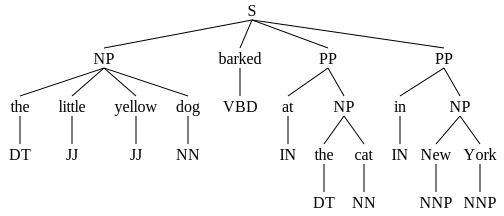

In [ ]:
sentence = [("the", "DT"), ("little", "JJ"), ("yellow", "JJ"),("dog", "NN"),\
 ("barked", "VBD"), ("at", "IN"), ("the", "DT"), ("cat", "NN"), \
 ("in", "IN"), ("New", "NNP"), ("York", "NNP")]

chunk_grammer = r"""NP: {<DT>?<JJ>*(<NN>|<NNP>)+}
              PP: {<IN><NP>}"""

cp = nltk.RegexpParser(chunk_grammer)
result = cp.parse(sentence)
svgling.draw_tree(result)

In order to get the evaluation results for the conll2000 corpus we use the following parser:

In [ ]:
test_parser = conll2000.chunked_sents('test.txt', chunk_types=['NP'])
print(cp.accuracy(test_parser))

ChunkParse score:
    IOB Accuracy:  65.7%%
    Precision:     39.7%%
    Recall:        27.0%%
    F-Measure:     32.1%%


If we compare the values we obtained here with those in the slides ("RegexpParser Example Page 15/17"), we can see that we achieved better results by changing the chunk grammar, except for precision, which is worse than in the slides.

Now let's try the other example that contains "NP" chunk to see how it will perform.

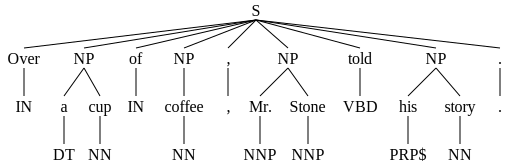

In [ ]:
sentenceTree = conll2000.chunked_sents('train.txt', chunk_types=['NP'])[99]
svgling.draw_tree(sentenceTree)

In [ ]:
# Convert the tree to a list contining words and POS_Tags
word_Tag = tree2conlltags(sentenceTree)
new = [(word,tag) for (word,tag,_) in word_Tag]

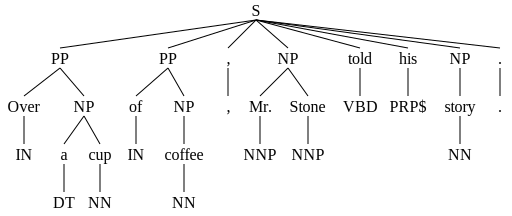

In [ ]:
# Pass the convertion we made into the parser
results = cp.parse(new)
svgling.draw_tree(results)

We can observe that several prepositional phrases (PPs) are correctly parsed, each containing distinct and entirely valid noun phrases (NPs) distributed throughout the sentence.